<a href="https://colab.research.google.com/github/SadeemAlBoqami/California-Housing-dataset-Data-Preparation/blob/main/Homework_1_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1: Data Preparation and Categorical Attributes

## Step 1: Frame the Problem, Get the Data
In this Homework I'll practice on how to preparing dataset to be ready to build an ML model.
Here I used ***California Housing dataset***.

The first step is getting Housing dataset from [GitHub repo](https://github.com/ageron/handson-ml2/tree/master/datasets/housing).

****Note:*** The author changed the file organisation in the repository for the third edition of the book, and the data sets are now in subfolders. Therefore, I used the repository for the second edition, where there is a folder containing the data sets directly.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

url="https://raw.githubusercontent.com/ageron/handson-ml2/refs/heads/master/datasets/housing/housing.csv"

housing = pd.read_csv(url) # pandas function to read CSV files
housing.head() # a function show first 5 rows, to make sure that we read the correct file

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Step 2: Explore the Data Structure
In this section, I'll explore data structure of California Housing dataset through:


*   `info()` to know the data types of columns, the number of non-empty values and the size of memory used.
*   `describe()`: to get descriptive statistics for all numerical columns (e.g. mean, standard deviation, minimum and maximum values)

*   `hist(bins=a, figsize=(x,y))` to draw **Histograms** for all numerical columns to visualize distributions and discover any outliers.




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

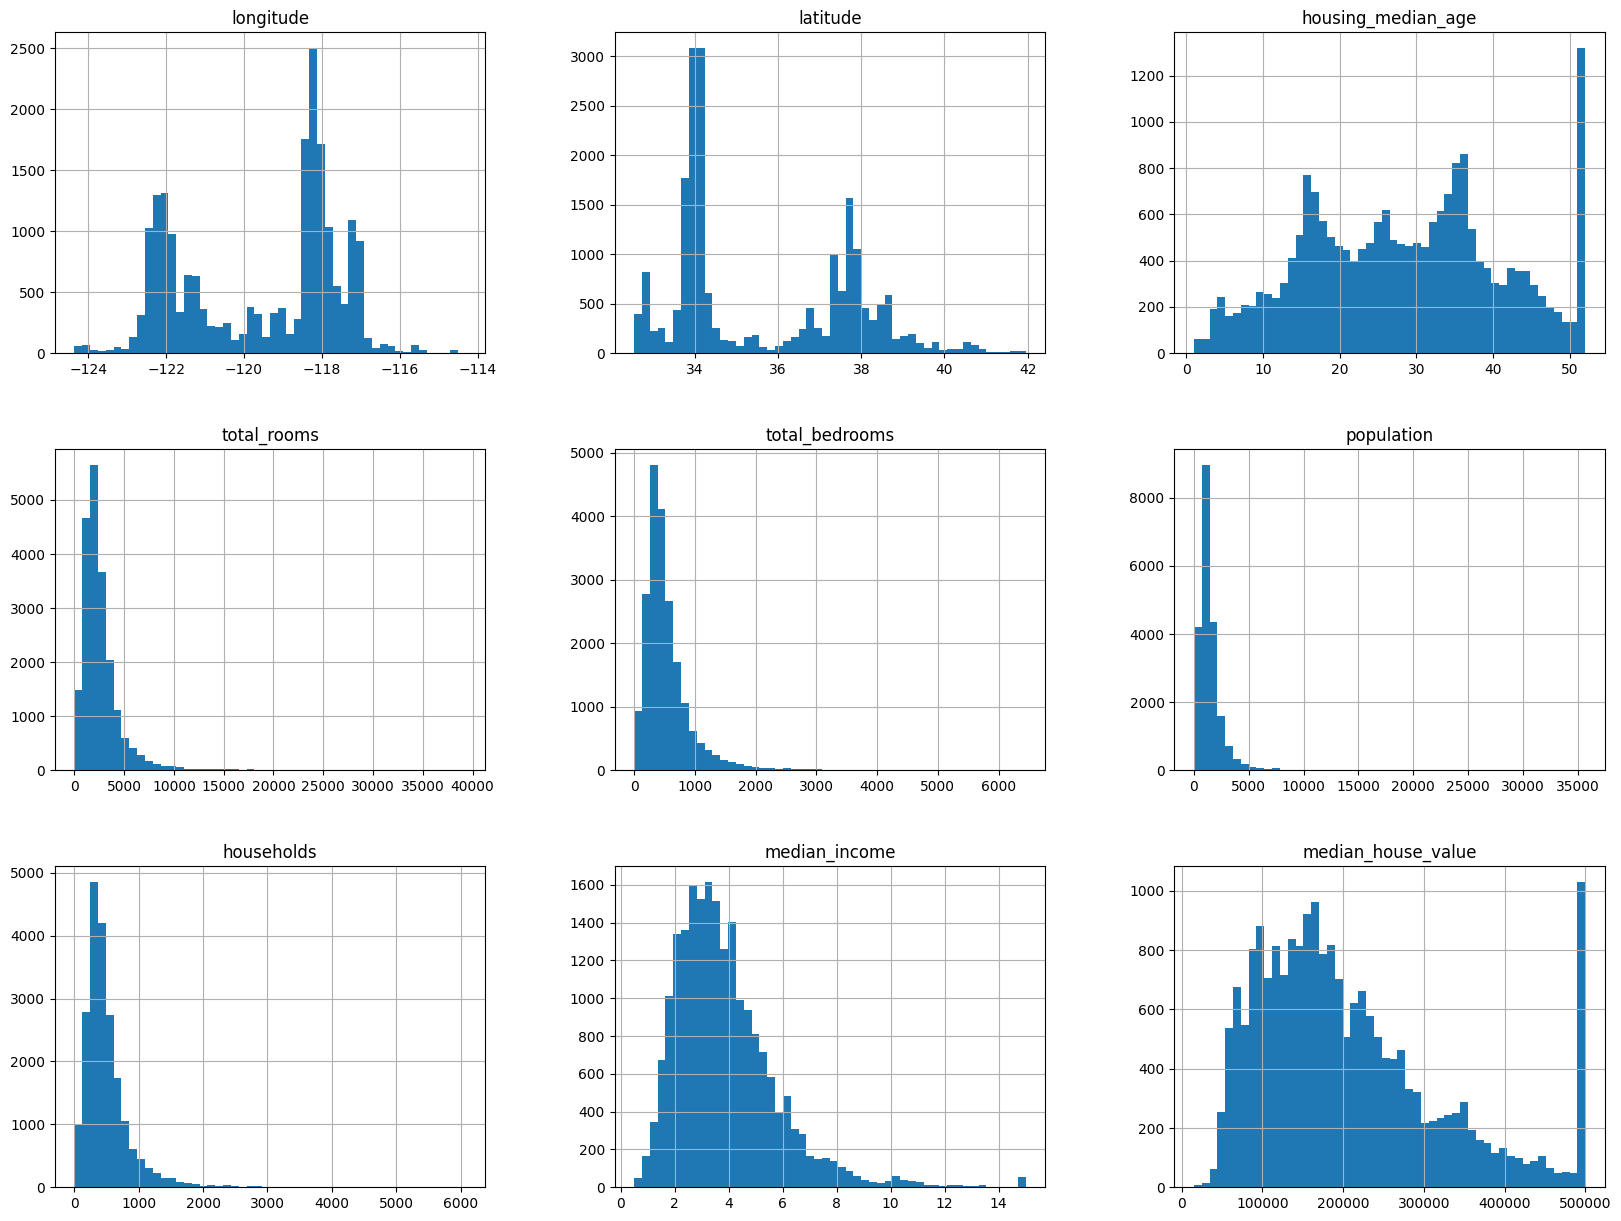

In [76]:
housing.info()
housing.describe()
housing.hist(bins=50, figsize=(20,15))


## Step 2 Notes:
* Data overview:
  - There are 10 columns (features), and 20,640 rows (districts in California).
  - The DataFrame consumes approximately 1.6 MB of memory, making it lightweight and easy to work with in analyses.

* Data Types:
  - There are 9 numerical columns (float64).
  - There is 1 categorical columns, determines the nearness of the area to the ocean.

* Missing Values:
    - I noticed that there is 20,433 values that are not-empty, therefor there are 20,640-20,433= 207 missing values.
    - The rest of numerical columns are all complete.

* Histograms:
  - The central inland areas and the west coast have more houses than the east coast.
  - A large number of houses are clustered in Southern California, specifically at latitude 34. There are +3,000 houses there.

  - Most districts (approximately 400-800 districts) are between 15 and 38 years old, while there is more than 1300 districts older than 50 years, that represent outliers in data.
  - There are 4000-5000 districts containing 1250-2500 rooms.
  - Districts with total of more than 5000 rooms are fewer than 1000 districts.
  - 2750-4500 Number of districts containing a total of 250-750 bedrooms.
  - There are 4000 district with population less than or equal to 2500.
  - There is an outlier value, that there are 8500 district with population approximately 1250.
  - Most of districts householders are between 250 and 750 families.
  - Most of districts have median income between `$20,000` and `$40,000`.
  - There are 400-800 districts have median house value between `$100,000` to `$250,000`, there is an outlier value that there are 1000 districts have median house value `$500,000`.
  



## Step 3: Create a Test Set
The test set based on the `median_income`.The set have to be satisfies so we will use `StartifiedShuffleSplit from scikit-learn`. It's a tool for randomly dividing data into training and testing sets while maintaining class proportions.

**Complete Process:**
1. First, we'll creata a supporting column `income_category`, that will help us in fair division.
2. We take the column `median_income` and divided it into (bins) like this:
- (0,2] --> class 1
- (2,4] --> class 2
- (4,6] --> class 3
- (6,8] --> class 4
- (8<)  --> class 5

3. The result is a new column `income_category` contains **Categories** instead of continouse values, So we ensure that each income class is represented in the train and test sets at the same rate as in the full data.

4. After that `StratifiedShuffleSplit`creats lists with numbers of rows from dataset.
5. `loc()` uses these numbers to extract the actual data.
6. The result is that we have two data sets, one for training `train_set`(approximately 80% of the rows) and one for testing `test_set`(approximately 20% of the rows), extracted from the complete data set.
7. After partitioning, we will verify that the distribution of categories in both the `training_set` and the `test_set` matches the distribution of categories in the original dataset.
  - Use `value_counts()` Function, we send a parameter `normalize=True` that will give us percentage instead of number for each set.

In [77]:
# Create "income_category" the supporting column
housing["income_category"]= pd.cut(housing["median_income"], bins=[0., 2.0, 4.0, 6.0, 8.0, np.inf], labels=[1,2,3,4,5])

# Create the object StratifiedShuffleSplit and put it in the variable splitter.
splitter= sklearn.model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2, train_size=None, random_state=42)

# Start splitting
for train_index, test_index in splitter.split(housing, housing["income_category"]):
  train_set=housing.loc[train_index]
  test_set=housing.loc[test_index]

# Verification of distribution
print(housing['income_category'].value_counts(normalize=True))
print(train_set['income_category'].value_counts(normalize=True))
print(test_set['income_category'].value_counts(normalize=True))

# Drop "income_category", since we don't need it again
housing.drop("income_category", axis=1, inplace=True)
train_set.drop("income_category", axis=1, inplace=True)
test_set.drop("income_category", axis=1, inplace=True)

income_category
2    0.489147
3    0.277374
1    0.119041
4    0.081008
5    0.033430
Name: proportion, dtype: float64
income_category
2    0.489159
3    0.277374
1    0.119004
4    0.081032
5    0.033430
Name: proportion, dtype: float64
income_category
2    0.489099
3    0.277374
1    0.119186
4    0.080911
5    0.033430
Name: proportion, dtype: float64


## Step 3 Notes:

**Greate Resulte!!**

The ratios are very similar to each category, that means each income category are distributed fairly.
So the `StratifiedShuffleSplit` succeeded in achieving the purpose for which it was used.


## Step 4: Discover & Visualize the Data

1.   I create a copy of the training set `train_set_copy` for exploration.
2.   Then, I plot a scatter plot of this copy, that show distribution
of median house value using longitude, latitude and population.

<Axes: xlabel='longitude', ylabel='latitude'>

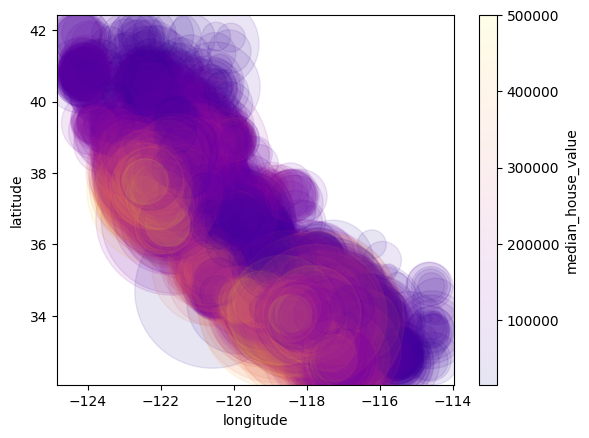

In [78]:
train_set_copy=train_set.copy() # create the copy of train_set

## using matplotlib.pyplot, More control over the plot but needs to specify additional properties
  ##plt.scatter(x=train_set_copy['longitude'],y=train_set_copy['latitude'],s=train_set_copy['population']/100, c=train_set_copy['median_house_value'], cmap='plasma', alpha= 0.1)

## I prefer to use pandas, for quick visualization.
train_set_copy.plot.scatter(x="longitude",
                            y="latitude",
                            s="population",
                            c="median_house_value",
                            cmap="plasma",
                            alpha=0.1)



## Step 4 cont'd:

3. We need to make a `correlation_matrix` and visualize it as a heatmap,that show us how closely related each feature is to each other, 1 = closely related, -1 = not related.



<Axes: >

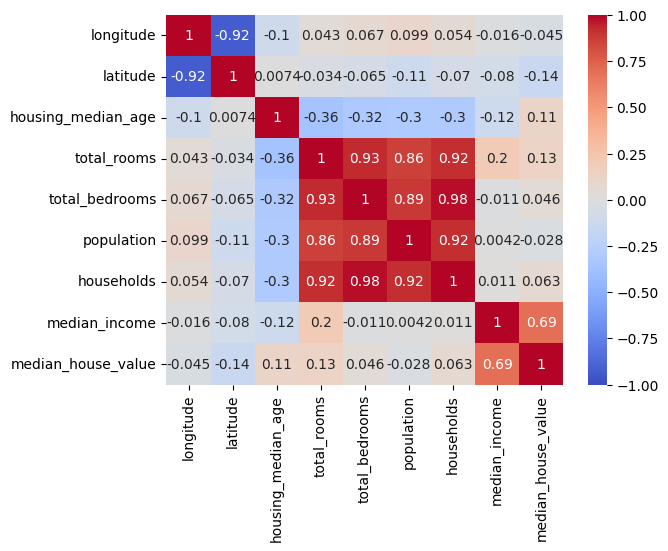

In [79]:
import seaborn as sns

# Drop the non-numeric column before calculating correlation
correlation_matrix= train_set_copy.drop('ocean_proximity', axis=1).corr('pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmax=1, vmin=-1)


## Step 4 cont'd:

4. To more understand of relations between attributes, I draw 3 plots for 3 attributes pairs as shown.

<Axes: xlabel='population', ylabel='total_bedrooms'>

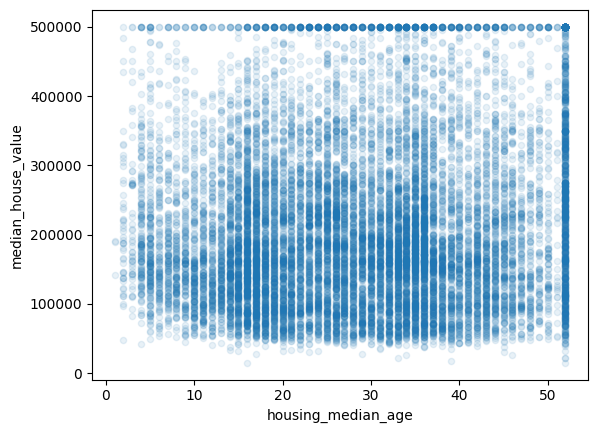

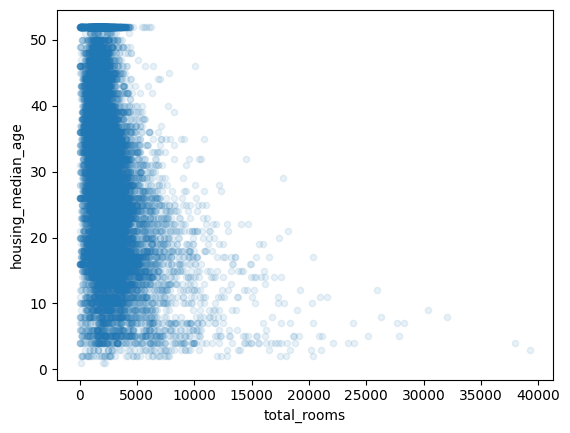

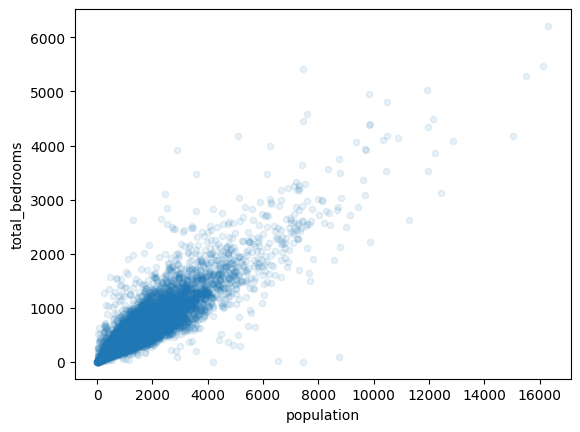

In [80]:
## housing_median_age vs. median_house_values
train_set_copy.plot.scatter(x="housing_median_age",
                            y="median_house_value",
                            alpha=0.1
                            )

## total_rooms vs. housing_median_age
train_set_copy.plot.scatter(x="total_rooms",
                            y="housing_median_age",
                            alpha=0.1
                            )

## population vs. total_bedrooms
train_set_copy.plot.scatter(x="population",
                            y="total_bedrooms",
                            alpha=0.1
                            )


## Step 4 Notes:

- Corrolations between attributes:
  - Strong Correlation between: `total_rooms`,`total_bedrooms` and `households`. Also between `median_house_value` and `median_income`.
  - Weak Correlation between: `total_rooms` , `population` and `housing_median_age`.

- **housing_median_age vs. median_house_values**: Most districts have homes that are between 15-35 years old, most likely priced at $300,00 or less, although there is no close correlation between the two attributes.

  Districts in (38,-123) and (34,-120) have the most median house values, when the districts between (41,-124) and (41,-121), and in (36,-120) have the least median house values.

- **total_rooms vs. housing_median_age**: The relationship between the number of rooms and the age of the house is weak, but we note that most districts have more than 5000 rooms for all ages of houses.

- **population vs. total_bedrooms**: The relationship between population and `total_bedrooms` is very strong, with most districts having 1000-2000 bedrooms with a population of 4000 or less.



## Step 5: Experiment wiyh Attributes Combinations
After studying correlation between attributes, I'll creat new attributes by combining existing ones that have a strong correlation to make sure that new attributes have useful meanings.



In [81]:
# Numbers of rooms per family
train_set_copy['rooms_per_housholds']=train_set_copy['total_rooms']/train_set_copy['households']

# Number of bedrooms per rooms
train_set_copy['bedrooms_per_room']= train_set_copy['total_bedrooms']/train_set_copy['total_rooms']

# Population per household
train_set_copy['population_per_household']= train_set_copy['population']/train_set_copy['households']

#  To show train_set_copy with new added Attributes
train_set_copy.columns




Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_housholds',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

## Step 5 Cont'd:
Now I'll recompute correlations with new attributes

<Axes: >

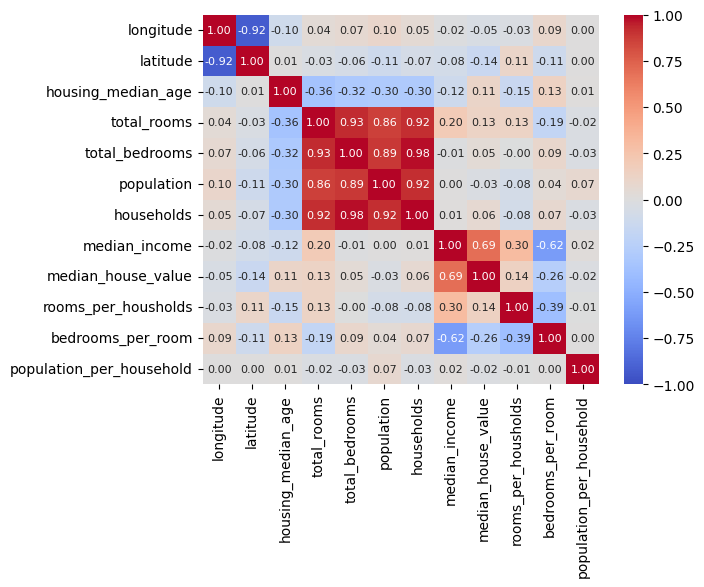

In [82]:
# Drop the non-numeric column before calculating correlation
correlation_matrix= train_set_copy.drop('ocean_proximity', axis=1).corr('pearson')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", annot_kws={"size":8}, cmap='coolwarm', vmax=1, vmin=-1)

## Step 5 Notes:
**We notice** `median_house_value` **correlations :**
- `rooms_per_households` = 0.14 --> The only positive correlation of the three new attributes. That means the houses with more rooms per households tend to have slightly higher value, but this is small effect.

- `bedrooms_per_rooms` = -0.26 --> Strongest correlation compared to other new attributes. It shows that the lower ratio of bedrooms per rooms increase the house value.  
*‘It means that the rooms in the house are diverse, which logically raises the price’*  

- `population_per_households` = -0.02 --> Weakest correlation, The number of people per household doesn't provide us useful predict about house value, we can say there is no relation with `median_house_value`.

**Finally:** No real benefit from new attributes, since there is no strong correlaition that we can use it to predict `median_house_value`.


## Step 6: Prepare the Data - Data Cleaning
 The first step in data cleaning is identify missing values, we can use pandas function `.isnull().sum()` to count missing values in each column in `train_set_copy`.

In [83]:
train_set_copy.isnull().sum() # count missing values in each column

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,167
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


So, we can see there is 167 missing value in `total_bedrooms` and `bedrooms_per_room` columns.

In general, to handle with missing values we can:
- **Drop** the column that contain missing value, but we will lose an important information.

- **Imputation** we can replace missing values with:
  - *mean:* If the numerical values have normal distribution.
  - *median:* If there is any outliers.
  - *mode:* The most frequent value, for categorical data.

In [84]:
# select median strategy and put it in method variable
imputer=SimpleImputer(strategy="median")

# Fit the imputer on the training set and transform it
train_set_copy[['total_bedrooms']] = imputer.fit_transform(train_set_copy[['total_bedrooms']])
train_set_copy[['bedrooms_per_room']] = imputer.fit_transform(train_set_copy[['bedrooms_per_room']])

# Verify no missing values remain
train_set_copy.isnull().sum()


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [85]:
# Show a sample of the cleaned data
train_set_copy.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_housholds,bedrooms_per_room,population_per_household
1817,-122.31,37.93,36.0,2403.0,408.0,917.0,404.0,5.0399,253400.0,NEAR BAY,5.948020,0.169788,2.269802
13308,-117.61,34.08,20.0,3550.0,736.0,2229.0,681.0,3.0199,128800.0,INLAND,5.212922,0.207324,3.273128
4025,-118.53,34.17,18.0,6430.0,1412.0,2897.0,1348.0,3.8550,243800.0,<1H OCEAN,4.770030,0.219596,2.149110
17138,-122.17,37.46,47.0,2312.0,332.0,1044.0,282.0,9.4590,500001.0,NEAR BAY,8.198582,0.143599,3.702128
9608,-120.51,37.29,20.0,4927.0,1042.0,4205.0,1009.0,1.7679,79800.0,INLAND,4.883053,0.211488,4.167493
18963,-122.04,38.27,16.0,8517.0,1910.0,4508.0,1837.0,3.1853,129600.0,INLAND,4.636364,0.224257,2.454001
11665,-118.03,33.85,23.0,5495.0,1141.0,2873.0,1004.0,3.9156,224100.0,<1H OCEAN,5.473108,0.207643,2.861554
15235,-117.26,32.96,36.0,1721.0,264.0,710.0,282.0,10.1768,500001.0,NEAR OCEAN,6.102837,0.153399,2.517730
16193,-121.30,37.96,52.0,1475.0,238.0,736.0,260.0,3.6591,105100.0,INLAND,5.673077,0.161356,2.830769
17031,-122.25,37.50,44.0,348.0,79.0,154.0,73.0,4.7708,253800.0,NEAR OCEAN,4.767123,0.227011,2.109589


## Step 6 Notes:
After using `SimpleImputer` with median strategy we handle with missing values, and our data become clean.


## Step 7: Handle Text and Categorical Attributes

To apply any algorithms all data needs to be numerical, so we have to convert any categorical column into numerical column through **encoding**.



In [86]:
# Creat OneHotEncoder object called encoder
encoder= OneHotEncoder()

# Identify all categories in the column and convert it to new column contain 0 or 1
encoder.fit(train_set_copy[['ocean_proximity']])
encoded_data= encoder.transform(train_set_copy[['ocean_proximity']])

# Show sparse matrix
print(encoded_data)

# Show dense array - clearer than spare matrix
encoded_data.toarray()

# Show the encoding features
#encoder.get_feature_names_out()



<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>
  Coords	Values
  (0, 3)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
  (3, 4)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 1)	1.0
  (9, 0)	1.0
  (10, 4)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 3)	1.0
  (14, 1)	1.0
  (15, 1)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 1)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 1)	1.0
  (22, 1)	1.0
  (23, 3)	1.0
  (24, 1)	1.0
  :	:
  (16487, 0)	1.0
  (16488, 1)	1.0
  (16489, 4)	1.0
  (16490, 4)	1.0
  (16491, 4)	1.0
  (16492, 1)	1.0
  (16493, 1)	1.0
  (16494, 0)	1.0
  (16495, 4)	1.0
  (16496, 0)	1.0
  (16497, 1)	1.0
  (16498, 1)	1.0
  (16499, 0)	1.0
  (16500, 0)	1.0
  (16501, 4)	1.0
  (16502, 3)	1.0
  (16503, 0)	1.0
  (16504, 3)	1.0
  (16505, 4)	1.0
  (16506, 0)	1.0
  (16507, 0)	1.0
  (16508, 1)	1.0
  (16509, 0)	1.0
  (16510, 4)	1.0
  (16511, 0)	1.0


array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

## Step 7 Notes:
After applying `OneHotEncoder` the sparse matrix show us that there are 16512 rows, divided into 5 classes.

Then I convert it to dense array and display categories names.

In general we've 3 types of encoding methods:
  - One-hot: simple and clear seperate each class completly.
  - Dummy: Reduce dimensions, but more complex.
  - Ordinal: Keep data arranged, but not good with random names "classes".

  So for our data, we have 5 categories, no order, the most suitable type is One-Hot Encoding.

  For me, no strong challenges observed through Encoding, but I had to work harder to understand sparse matrix.

# Conclusion

After finish Data preparation process, I got alot of knowledge:
- Actually, I didn't giuss before this time that the process of data preparation takes all these steps, I found it really important process.
- Understanding and Reading your data is the first and most important step to perform any process in your data. Otherwise, you'll be floundering and doing things that don't make sense or may be get wrong results.
- Strong Model depend on Good data, Good data must be understood well, prapared and cleand.

### Challenges Faced:
No big challenges, I have fun during this assignment, get new information. I was hoping to have a real experience of working with data and getting into this field, I love it so much!!.

---


**Sadeem Faihan Motlaq AlBoqami**  
**Acadimic ID: 44209352**
